In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
for col in df.columns:
    print(col, df[col].isnull().values.any())

PassengerId False
Survived False
Pclass False
Name False
Sex False
Age True
SibSp False
Parch False
Ticket False
Fare False
Cabin True
Embarked True


In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna('U')

In [6]:
pclass_encoding = pd.get_dummies(df['Pclass'], prefix='Pclass')
sex_encoding = pd.get_dummies(df['Sex'], prefix='Sex')
embarked_encoding = pd.get_dummies(df['Embarked'], prefix='Embarked')

df = pd.concat([df, pclass_encoding, sex_encoding, embarked_encoding], axis=1)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.188552,0.086420,0.722783,0.002245
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.391372,0.281141,0.447876,0.047351
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
def train_test(df, feature_cols, pred_col):
    X = df[feature_cols].values
    y = df[pred_col].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=800)
    #tidak berpengaruh sama sekali untuk test size dan random statenya, ini berpengaruh ketika kita memproses pada linier regresi
    clf = svm.SVC().fit(X_train, y_train)
    y_preds = clf.predict(X_test)
    
    correct_prediction = 0
    for t, p in zip(y_test, y_preds):
        if t == p:
            correct_prediction += 1
    
    return correct_prediction/len(y_test)

In [9]:
feature_cols = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 
                'Embarked_C', 'Embarked_Q', 'Embarked_S']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.6555555555555556

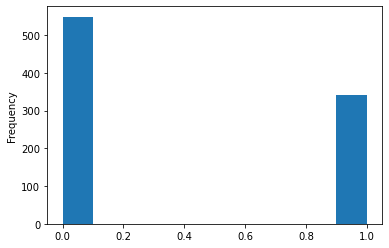

In [10]:
df['Survived'].plot.hist()

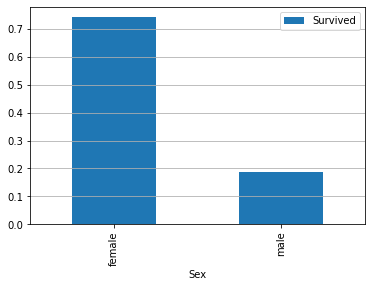

In [11]:
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
plt.grid(axis='y')
plt.show()

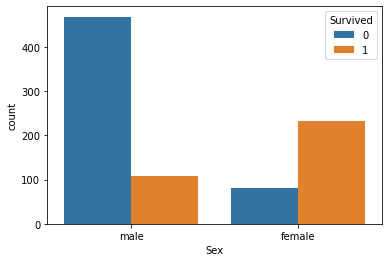

In [12]:
sns.countplot('Sex',hue='Survived',data=df)
plt.show()

In [13]:
feature_cols = ['Sex_female']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.8333333333333334

AttributeError: 'Rectangle' object has no property 'normed'

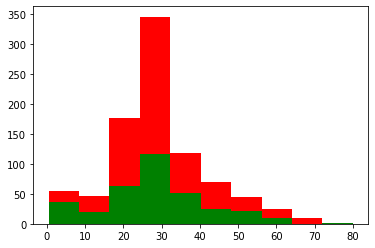

In [14]:
survived_df = df[df['Survived'] == 1]
non_survived_df = df[df['Survived'] == 0]
plt.hist([survived_df['Age'], non_survived_df['Age']], bins = 10, stacked=True,
         normed=True, color = ['g','r'], label=['survived', 'non_survived'])
plt.show()

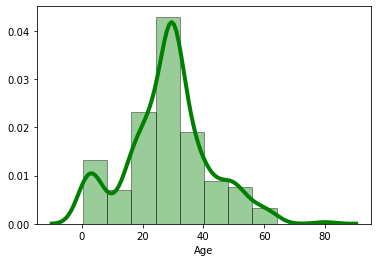

In [15]:
sns.distplot(survived_df['Age'], hist=True, kde=True, 
             bins=10, color = 'g', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

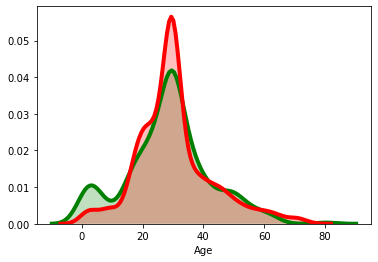

In [16]:
sns.distplot(survived_df['Age'], hist=False, kde=True, 
             bins=10, color = 'g', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'shade':True})
sns.distplot(non_survived_df['Age'], hist=False, kde=True, 
             bins=10, color = 'r', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'shade':True})

In [17]:
df.groupby(['Survived','Pclass'])['Survived'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64

In [18]:
pd.crosstab(df.Pclass, df.Survived).style.background_gradient()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [19]:
pd.crosstab(df['Pclass'], df['Survived'], normalize='index').style.background_gradient()

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [20]:
pd.crosstab([df['Sex'],df['Pclass']], df['Survived'], normalize='index').style.background_gradient()

In [21]:
pd.crosstab([df['Sex'],df['Pclass']], df['Survived']).style.background_gradient()

In [22]:
feature_cols = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.7666666666666667

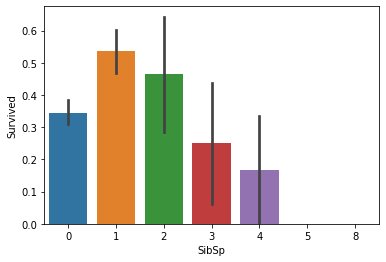

In [23]:
sns.barplot('SibSp','Survived',data=df)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


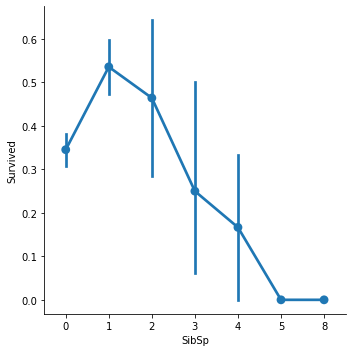

In [24]:
sns.factorplot('SibSp','Survived',data=df)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


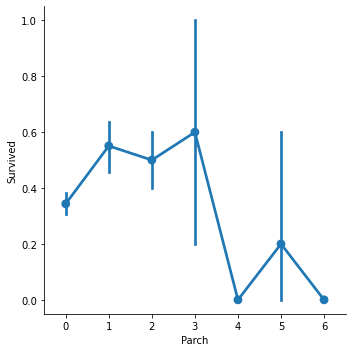

In [25]:
sns.factorplot('Parch','Survived',data=df)

In [26]:
df['less_parch'] = np.where(df['Parch'] <= 3, 1, 0)
df['less_sibsp'] = np.where(df['Parch'] <= 2, 1, 0)

In [27]:
feature_cols = ['SibSp', 'Parch', 'Sex_female']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.8444444444444444

In [28]:
feature_cols = ['SibSp', 'Parch', 'less_parch', 'Sex_female']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.8444444444444444

In [29]:
feature_cols = ['SibSp', 'Parch', 'Sex_male']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.8444444444444444

In [30]:
feature_cols = ['SibSp', 'less_parch','Sex_male']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.8444444444444444

In [31]:
feature_cols = ['SibSp', 'Sex_female']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.8444444444444444

In [32]:
feature_cols = ['less_parch','Sex_male']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.8333333333333334

In [33]:
feature_cols = ['Age', 'Fare', 'Pclass_1', 'Pclass_2','Embarked_C','Embarked_S','Sex_male'] 
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.6444444444444445

In [34]:
feature_cols = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 
                'Embarked_C', 'Embarked_Q', 'Embarked_S']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.6555555555555556

In [35]:
feature_cols = ['Age']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.6666666666666666

In [36]:
feature_cols = ['Age', 'Sex_female']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.6666666666666666

In [37]:
feature_cols = ['Age', 'Sex_male']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.6666666666666666

In [38]:
feature_cols = ['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_C', 'Embarked_S']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.6777777777777778

In [39]:
feature_cols = ['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Embarked_C', 'Embarked_S']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.6777777777777778

In [40]:
feature_cols = ['Sex_male']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.8333333333333334

In [41]:
feature_cols = ['Sex_female']
pred_col = 'Survived'
train_test(df, feature_cols, pred_col)

0.8333333333333334

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, feature_cols, pred_col, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

ValueError: Found input variables with inconsistent numbers of samples: [1, 8]